In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Directories for dataset
train_dir = "Lentil Plant Disease Image Dataset (4 Class)/Lentil Disease Dataset/Train"
validation_dir = "Lentil Plant Disease Image Dataset (4 Class)/Lentil Disease Dataset/Validation"
test_dir = "Lentil Plant Disease Image Dataset (4 Class)/Lentil Disease Dataset/Test"

In [ ]:
# Parameters
input_shape = (224, 224, 3)  # Updated input size for ResNet
batch_size = 32
num_classes = 4  # Number of classes in the dataset

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4540 images belonging to 4 classes.
Found 456 images belonging to 4 classes.
Found 457 images belonging to 4 classes.


In [ ]:
# Load Pretrained ResNet50 Model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = True  # Unfreeze for fine-tuning

In [ ]:
# Build Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile Model
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6)

In [10]:
# Train Model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

c:\Users\rg002\OneDrive\Desktop\7thsem project\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2837 - loss: 13.3126

c:\Users\rg002\OneDrive\Desktop\7thsem project\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 548s 3s/step - accuracy: 0.2840 - loss: 13.3113 - val_accuracy: 0.3114 - val_loss: 13.0725 - learning_rate: 1.0000e-05
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - accuracy: 0.4244 - loss: 12.7759 - val_accuracy: 0.3114 - val_loss: 14.0503 - learning_rate: 1.0000e-05
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.5079 - loss: 12.4576 - val_accuracy: 0.3114 - val_loss: 14.1994 - learning_rate: 1.0000e-05
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 537s 4s/step - accuracy: 0.6201 - loss: 12.1347 - val_accuracy: 0.2873 - val_loss: 12.8747 - learning_rate: 1.0000e-05
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 672s 5s/step - accuracy: 0.6998 - loss: 11.8286 - val_accuracy: 0.3026 - val_loss: 12.3120 - learning_rate: 1.0000e-05
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 650s 5s/step - accuracy: 0.7327 - loss: 11.5797 - val_accuracy: 0.3509 - val_loss: 12.1240 - learning_rate: 1.0000e-05
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 657s 5s/step - ac

In [14]:
# Evaluate Model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 685ms/step - accuracy: 0.8490 - loss: 6.8918
Test Loss: 6.86543607711792
Test Accuracy: 0.8730853199958801


In [15]:
# Save Model
model.save('lentil_disease_resnet_model.h5')

15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 823ms/step


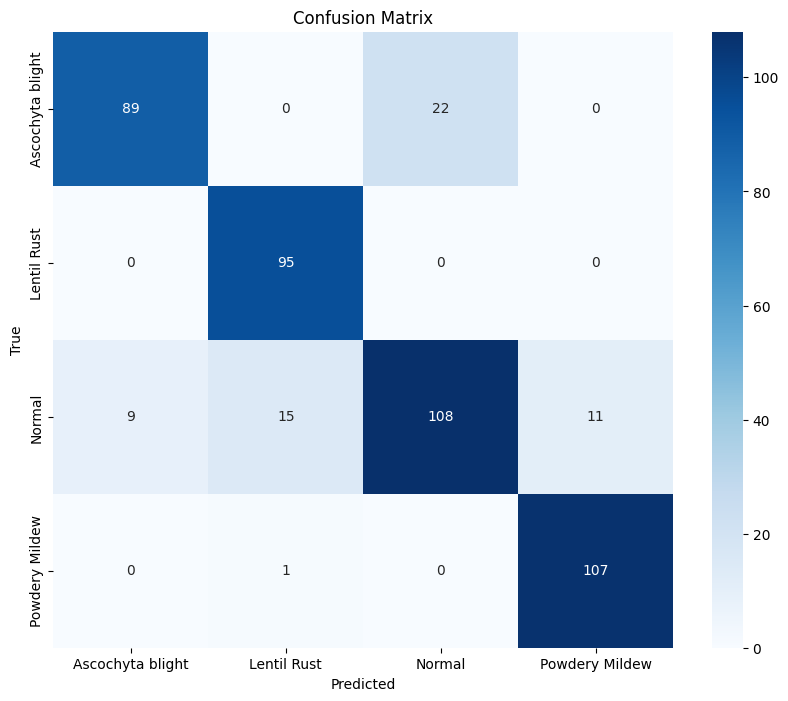

                  precision    recall  f1-score   support

Ascochyta blight       0.91      0.80      0.85       111
     Lentil Rust       0.86      1.00      0.92        95
          Normal       0.83      0.76      0.79       143
  Powdery Mildew       0.91      0.99      0.95       108

        accuracy                           0.87       457
       macro avg       0.88      0.89      0.88       457
    weighted avg       0.87      0.87      0.87       457



In [16]:
# Plot Training and Validation Metrics
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training(history)

# Predict and Evaluate
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [18]:
# Define class names according to your dataset
class_names = ['Ascochyta blight', 'Lentil Rust', 'Normal', 'Powdery Mildew']
# Function to display predictions
def display_predictions(images, predictions, labels, class_names):
    num_images = len(images)
    plt.figure(figsize=(15, num_images * 3))

    for i in range(num_images):
        image = (images[i] * 255).astype('uint8')
        confidence_scores = predictions[i]
        predicted_class_index = np.argmax(confidence_scores)
        predicted_class_name = class_names[predicted_class_index]
        predicted_confidence = confidence_scores[predicted_class_index]

        actual_class_index = np.argmax(labels[i])  # Assuming labels are one-hot encoded
        actual_class_name = class_names[actual_class_index]

        # Plot the image
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(image)
        plt.axis('off')

        # Display actual class, predicted class, and confidence
        plt.title(
            f"Actual: {actual_class_name} | Predicted: {predicted_class_name} | Confidence: {predicted_confidence:.2f}",
            fontsize=12
        )

    plt.tight_layout()
    plt.show()

# Get predictions and display results for the first batch
for images_batch, labels_batch in test_generator:
    predictions = model.predict(images_batch)
    display_predictions(images_batch, predictions, labels_batch, class_names)
    break  # Only process the first batch

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
